

# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> iam using TMdb data set ,
> This data set contains information about 10000  movies collected from The Movie Database. It consist of 21 columns


### Question(s) for Analysis

Top Movies based on their revenue?

Top Movies based on their budget?


In [40]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [41]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable


### General Properties
- No unit of currency is mentioned in the dataset.

- vote_count is different for all the movies


In [42]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')


In [43]:
df.shape


(10866, 21)


### Data Cleaning
- drop unused  cloumns 
- drop duplicated rows
- drop null rows of budget , revenue and runtime cloumns
- change type of revenue and budget
- Changing release date column into date format


# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.




Drop unused  columns

In [44]:
df.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1,inplace=True)

In [45]:
df.shape

(10866, 10)

Drop dupliacted rows


In [46]:
df.drop_duplicates(keep='first',inplace=True)

In [47]:
df.shape


(10865, 10)

convert all zeros of budget , revenue and runtime to NULL

In [48]:
cloumns_to_nulls=['budget','revenue','runtime']

df[cloumns_to_nulls]=df[cloumns_to_nulls].replace(0,np.nan)


Drop all Null values of budget , revenue and runtime

In [49]:
df.dropna(subset=cloumns_to_nulls,inplace=True)


In [50]:
df.shape

(3854, 10)

 change type of revenue and budget 

In [51]:
columns=['revenue','budget']
df[columns]=df[columns].applymap(np.int64)

Changing release date column into date format

In [52]:
df.release_date = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis
questions we need to asked ??




# 1. Top Movies based on their revenue ?

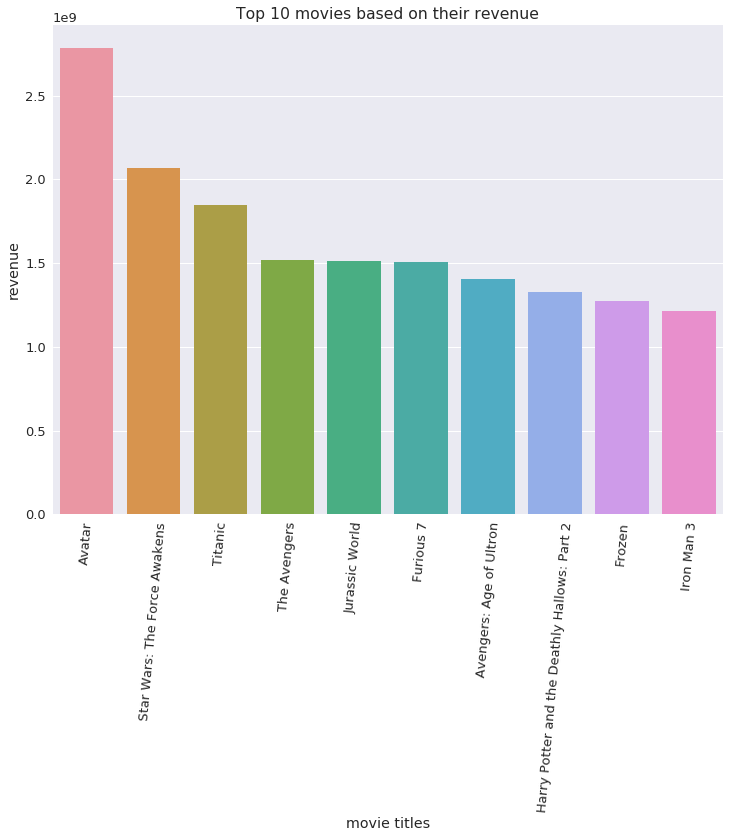

In [53]:
revenue_dict = {}
movies_and_revenue = df[["original_title", "revenue"]]
movies_and_budget = df[['original_title','budget']]
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue", ascending=False).head(10).revenue)
for item in ax.get_xticklabels():
    item.set_rotation(85)    
ax.set(xlabel='movie titles', ylabel='revenue', title = 'Top 10 movies based on their revenue')
plt.show()

the top 5 movies from the given dataset based on their revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.

# Average runtime of the movies?

In [54]:
def average(column):
    return df[column].mean()

In [55]:
average('runtime')

109.22029060716139

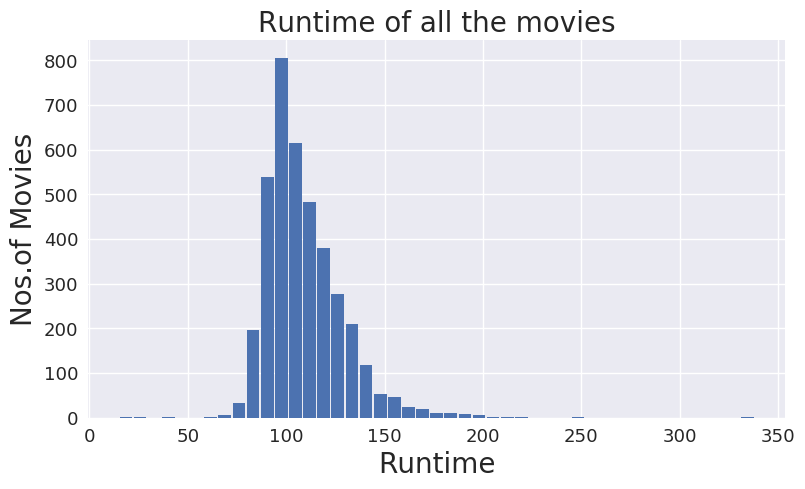

In [56]:
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Nos.of Movies', fontsize=20)
plt.title('Runtime of all the movies', fontsize=20)

plt.hist(df['runtime'], rwidth = 0.9, bins =45)
plt.show()

 The distribution of the above formed graph is right skewed . Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

<a id='conclusions'></a>
## Conclusions
This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors.Hence data cleaning is a necessary part before moving on to the dataset's investigation. 
and we define function avarage and call it  

and we get informantion from data that :
- what top 10 movies in revenue by bar plot
- the average of run time of all movies and represent it by histogram 

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0